In [ ]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATA_PATH = "./data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [3]:
download_dataset(DATA_PATH)

✅ Dataset já existe em: ./data
Pulando download...


In [4]:
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH)
X_test, y_test, _ = load_dataset(TEST_PATH)

X_train.shape, y_train.shape, LABEL_MAP

((28709, 48, 48, 3),
 (28709,),
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [8]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
}

2025-09-11 20:03:29.234480: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...
Epoch 1/60


2025-09-11 20:04:45.916598: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1961 - loss: 3.2218

2025-09-11 20:05:33.576304: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.2247 - loss: 2.7917 - val_accuracy: 0.2957 - val_loss: 1.9220 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.2732 - loss: 2.1679 - val_accuracy: 0.3312 - val_loss: 1.7669 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3039 - loss: 1.9433 - val_accuracy: 0.3459 - val_loss: 1.7011 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.3299 - loss: 1.8156 - val_accuracy: 0.3602 - val_loss: 1.6634 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.3474 - loss: 1.7421 - val_accuracy: 0.3645 - val_loss: 1.6402 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3638 - loss: 1.6881 - val_accuracy: 0.3708 - val_loss: 1.6138 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accurac

2025-09-11 20:41:07.951602: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2261 - loss: 1.8956

2025-09-11 20:42:34.405428: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 111s 128ms/step - accuracy: 0.2577 - loss: 1.8288 - val_accuracy: 0.3251 - val_loss: 1.6846 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 85s 118ms/step - accuracy: 0.3156 - loss: 1.7202 - val_accuracy: 0.3542 - val_loss: 1.6374 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 85s 118ms/step - accuracy: 0.3391 - loss: 1.6687 - val_accuracy: 0.3678 - val_loss: 1.6137 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 91s 126ms/step - accuracy: 0.3525 - loss: 1.6420 - val_accuracy: 0.3718 - val_loss: 1.5962 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.3627 - loss: 1.6218 - val_accuracy: 0.3790 - val_loss: 1.5864 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.3675 - loss: 1.6079 - val_accuracy: 0.3826 - val_loss: 1.5736 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step -

2025-09-11 21:45:38.018965: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 199ms/step - accuracy: 0.1988 - loss: 1.9779 - val_accuracy: 0.2679 - val_loss: 1.7763 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.2508 - loss: 1.8176 - val_accuracy: 0.3102 - val_loss: 1.7133 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.2797 - loss: 1.7651 - val_accuracy: 0.3292 - val_loss: 1.6820 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.3031 - loss: 1.7253 - val_accuracy: 0.3389 - val_loss: 1.6621 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.3131 - loss: 1.7107 - val_accuracy: 0.3438 - val_loss: 1.6508 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.3195 - loss: 1.6909 - val_accuracy: 0.3495 - val_loss: 1.6407 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/

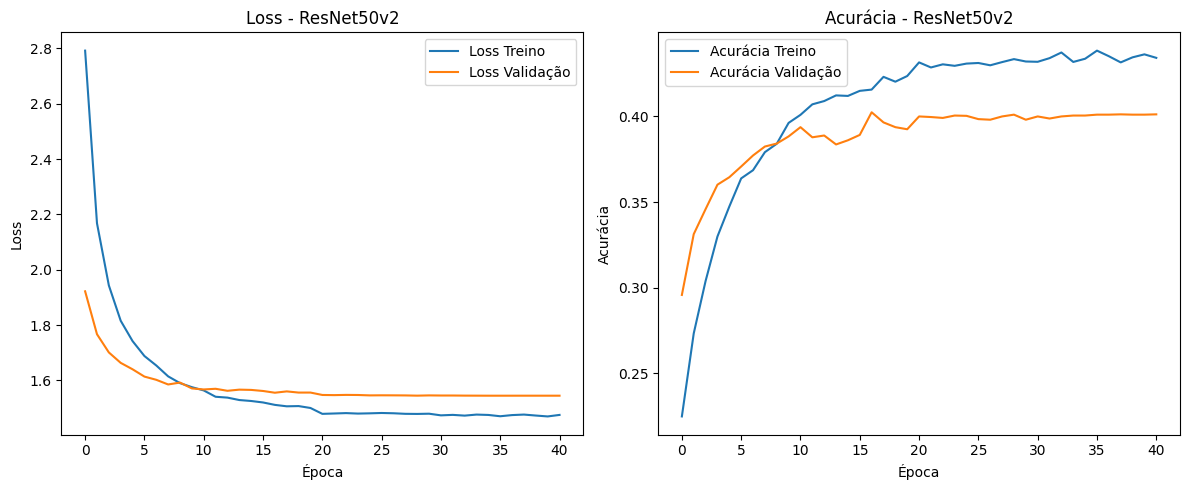

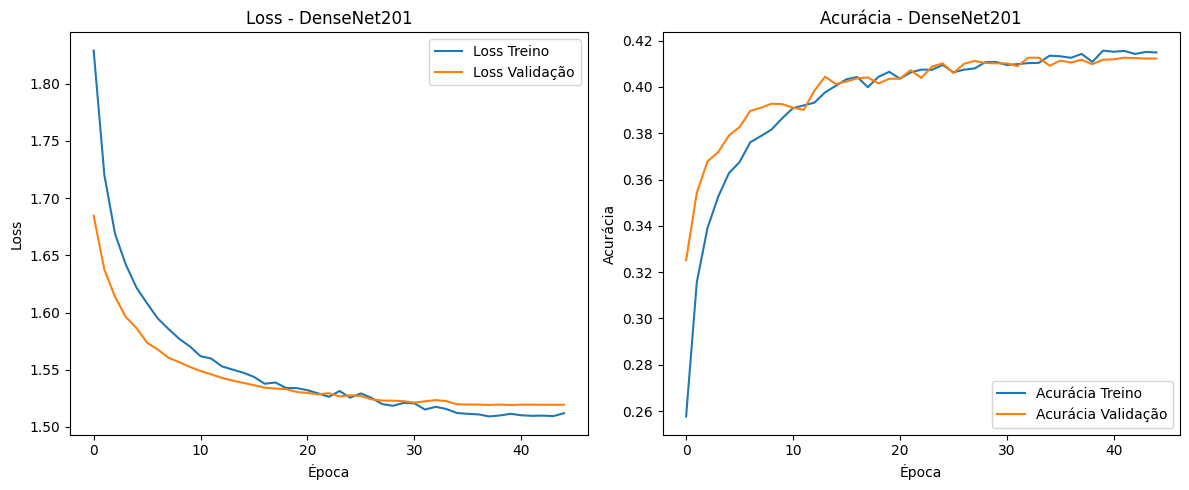

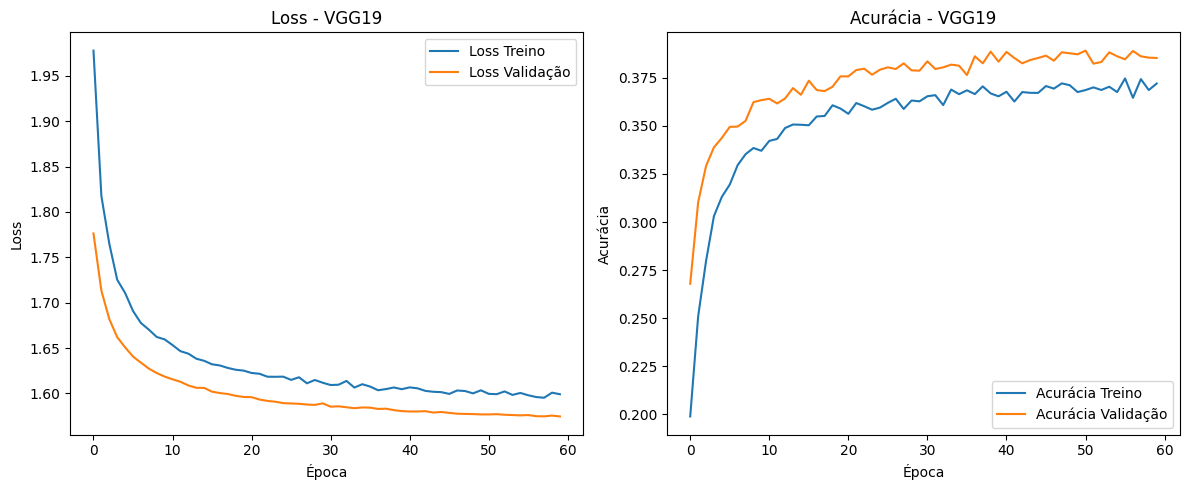

In [13]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [14]:
y_preds = {}
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4546
Precision Score:  0.5094
Recall Score:     0.3798
F1 Score:         0.3881

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.25      0.31      3995
           1       0.88      0.08      0.15       436
           2       0.39      0.26      0.31      4097
           3       0.47      0.75      0.58      7215
           4       0.43      0.39      0.41      4965
           5       0.41      0.39      0.40      4830
           6       0.56      0.52      0.54      3171

    accuracy                           0.45     28709
   macro avg       0.51      0.38      0.39     28709
weighted avg       0.45      0.45      0.44     28709


Acurácia por classe:
- angry: 25.26%
- disgust: 8.26%
- fear: 26.21%
- happy: 75.19%
- neutral: 39.40%
- sad: 39.05%
- surprise: 52.48%


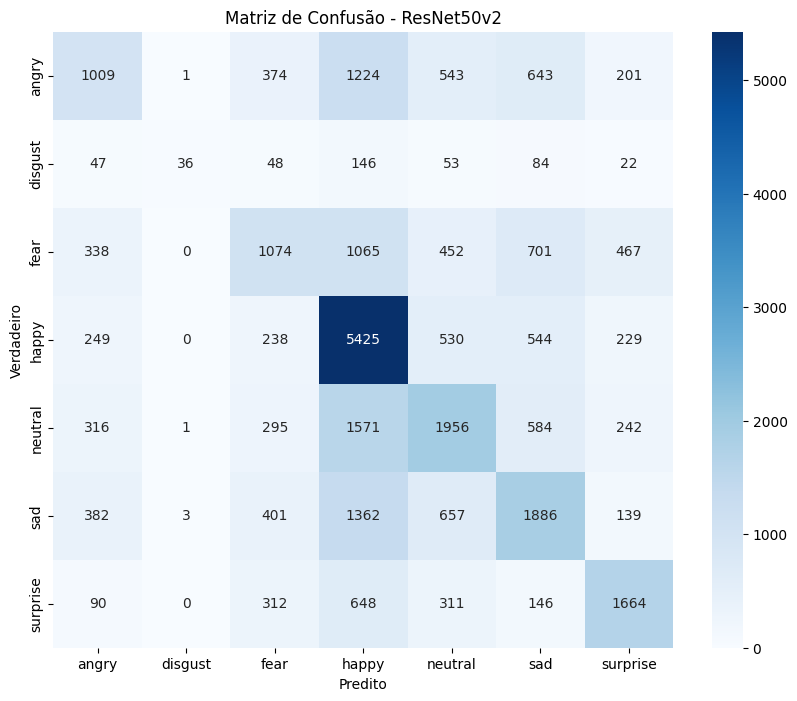

Métricas do modelo: DenseNet201
Accuracy Score:   0.4346
Precision Score:  0.4808
Recall Score:     0.3599
F1 Score:         0.3648

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.24      0.30      3995
           1       0.79      0.06      0.11       436
           2       0.39      0.22      0.28      4097
           3       0.46      0.73      0.56      7215
           4       0.41      0.39      0.40      4965
           5       0.38      0.38      0.38      4830
           6       0.56      0.52      0.54      3171

    accuracy                           0.43     28709
   macro avg       0.48      0.36      0.36     28709
weighted avg       0.43      0.43      0.41     28709


Acurácia por classe:
- angry: 23.58%
- disgust: 5.96%
- fear: 21.60%
- happy: 72.53%
- neutral: 38.77%
- sad: 37.87%
- surprise: 51.62%


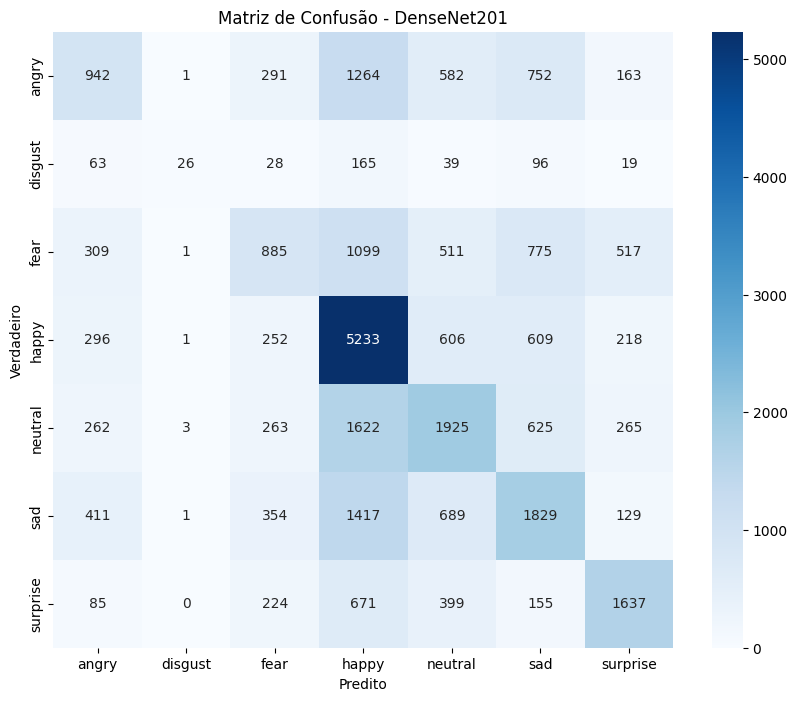

Métricas do modelo: VGG19
Accuracy Score:   0.3928
Precision Score:  0.3383
Recall Score:     0.3113
F1 Score:         0.3032

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.14      0.20      3995
           1       0.00      0.00      0.00       436
           2       0.37      0.15      0.22      4097
           3       0.40      0.72      0.51      7215
           4       0.36      0.34      0.35      4965
           5       0.34      0.35      0.34      4830
           6       0.51      0.48      0.49      3171

    accuracy                           0.39     28709
   macro avg       0.34      0.31      0.30     28709
weighted avg       0.38      0.39      0.36     28709


Acurácia por classe:
- angry: 13.74%
- disgust: 0.00%
- fear: 15.28%
- happy: 72.45%
- neutral: 33.80%
- sad: 34.64%
- surprise: 48.03%


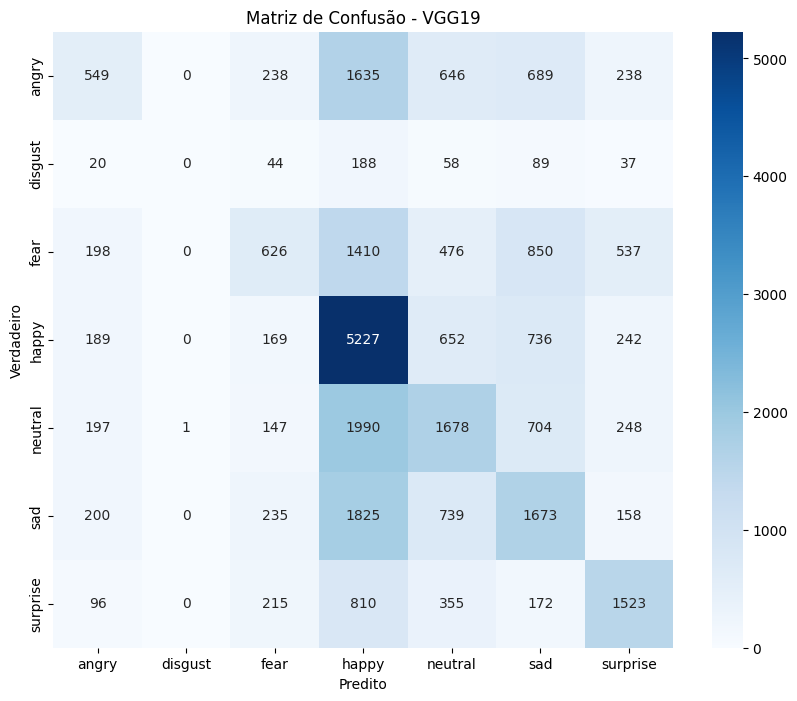

In [47]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_completa", LABEL_MAP)

In [48]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.415
Precision Score:  0.4441
Recall Score:     0.3442
F1 Score:         0.3482

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.21      0.25       958
           1       0.73      0.07      0.13       111
           2       0.32      0.21      0.25      1024
           3       0.46      0.72      0.56      1774
           4       0.39      0.35      0.37      1233
           5       0.35      0.33      0.34      1247
           6       0.55      0.51      0.53       831

    accuracy                           0.42      7178
   macro avg       0.44      0.34      0.35      7178
weighted avg       0.40      0.42      0.39      7178


Acurácia por classe:
- angry: 20.98%
- disgust: 7.21%
- fear: 20.80%
- happy: 72.38%
- neutral: 34.96%
- sad: 33.36%
- surprise: 51.26%


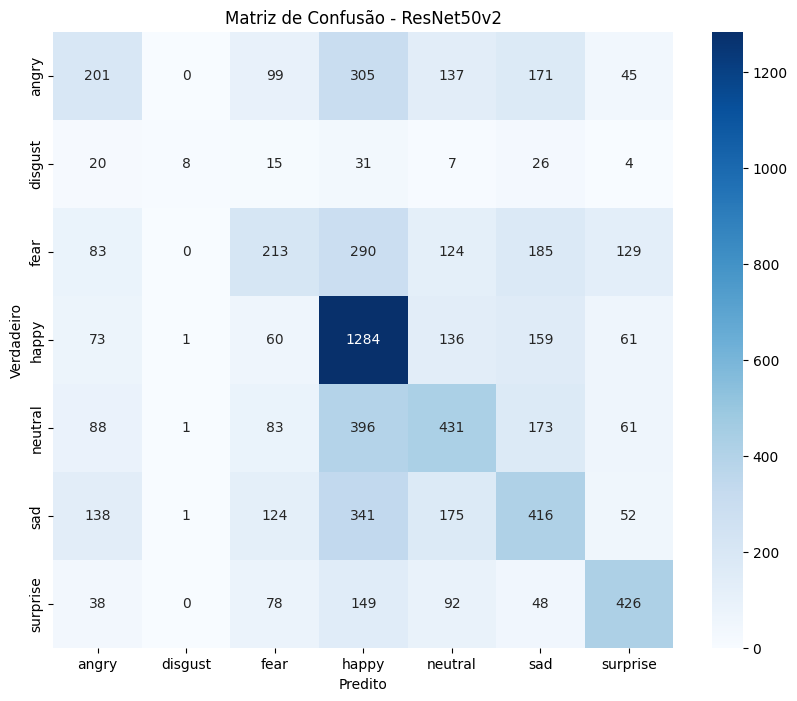

Métricas do modelo: DenseNet201
Accuracy Score:   0.4086
Precision Score:  0.4495
Recall Score:     0.3338
F1 Score:         0.3336

Classification Report:

              precision    recall  f1-score   support

           0       0.30      0.19      0.24       958
           1       0.80      0.04      0.07       111
           2       0.29      0.18      0.22      1024
           3       0.45      0.71      0.55      1774
           4       0.37      0.34      0.36      1233
           5       0.37      0.36      0.37      1247
           6       0.56      0.51      0.54       831

    accuracy                           0.41      7178
   macro avg       0.45      0.33      0.33      7178
weighted avg       0.40      0.41      0.39      7178


Acurácia por classe:
- angry: 19.42%
- disgust: 3.60%
- fear: 17.87%
- happy: 71.08%
- neutral: 34.39%
- sad: 36.01%
- surprise: 51.26%


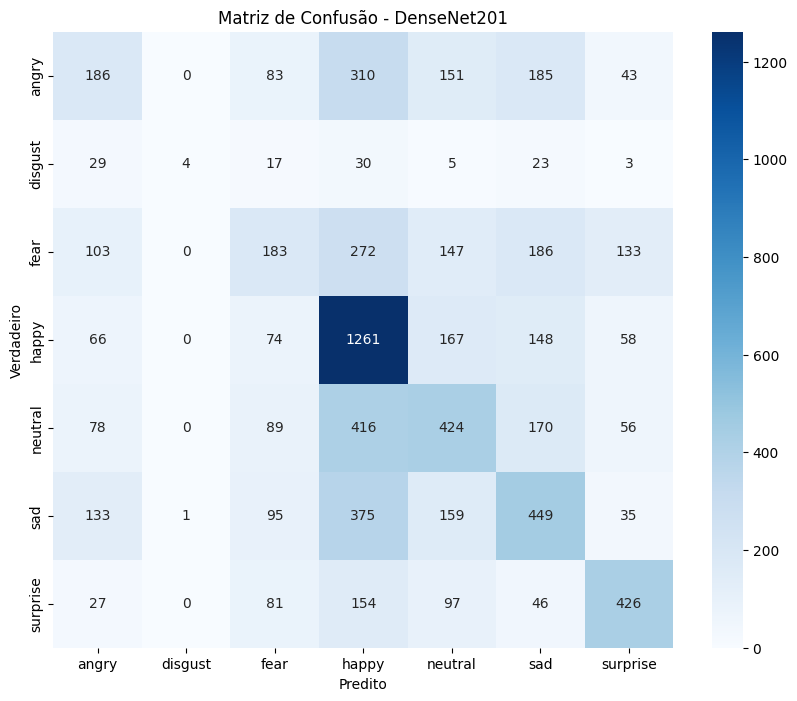

Métricas do modelo: VGG19
Accuracy Score:   0.3755
Precision Score:  0.3129
Recall Score:     0.2969
F1 Score:         0.287

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.12      0.17       958
           1       0.00      0.00      0.00       111
           2       0.30      0.12      0.17      1024
           3       0.39      0.70      0.50      1774
           4       0.33      0.32      0.32      1233
           5       0.35      0.34      0.34      1247
           6       0.52      0.48      0.50       831

    accuracy                           0.38      7178
   macro avg       0.31      0.30      0.29      7178
weighted avg       0.36      0.38      0.34      7178


Acurácia por classe:
- angry: 11.80%
- disgust: 0.00%
- fear: 12.21%
- happy: 70.07%
- neutral: 31.87%
- sad: 33.84%
- surprise: 48.01%


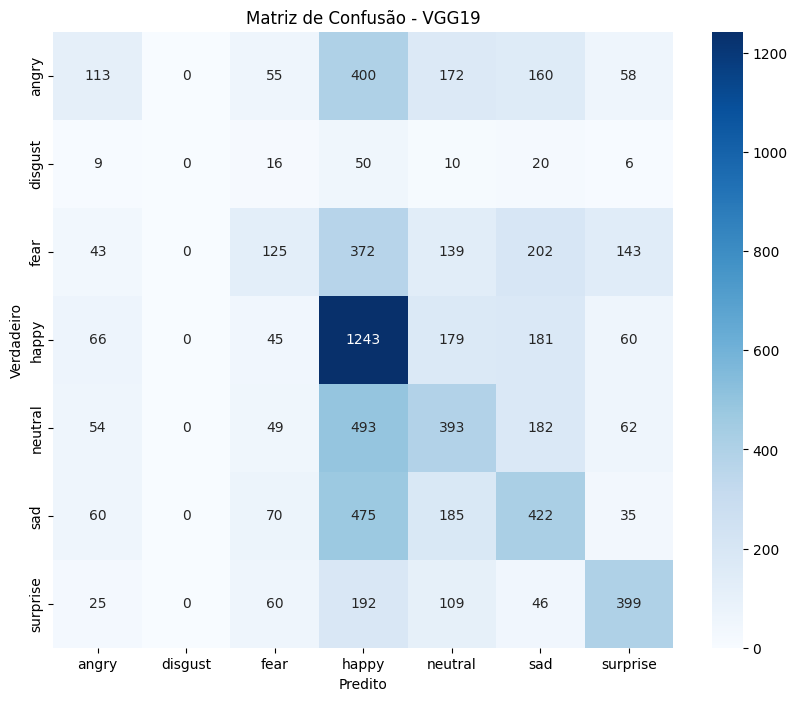

In [49]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name, "confusion_matrix_completa", LABEL_MAP, is_test=True)